<a href="https://colab.research.google.com/github/techakilan/python-datascience-training/blob/master/PythonPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

##### Get Version

In [ ]:

print(pd.__version__) 

### Series

In [ ]:
mylist = [1, 7, 2]
myseries = pd.Series(mylist)
print(myseries)

0    1
1    7
2    2
dtype: int64


In [ ]:
type(myseries)

pandas.core.series.Series

In [ ]:
# implicit index
myseries.iloc[0]

1

In [ ]:
# implicit index
myseries.iloc[1]

7

In [ ]:
myseries2 = pd.Series(mylist, index=[1,2,3])
print(myseries2)

1    1
2    7
3    2
dtype: int64


In [ ]:
# implicit index
myseries2.iloc[1]

7

In [ ]:
#explicit index
myseries2.loc[1]

1

##### Default index

In [ ]:
print(myseries)

In [ ]:
# access items in a series
print(myseries[0])
print(myseries[1])
print(myseries[2])

##### Labelled Index

In [ ]:
mylist = [1, 7, 2]
myseries =  pd.Series(mylist, index = ["x", "y", "z"])
print(myseries)

In [ ]:
# access items in a series
print(myseries["x"])
print(myseries["y"])
print(myseries["z"])

In [ ]:
# access items in a series
print(myseries[0])
print(myseries[1])
print(myseries[2])

##### Create series using Dict

In [ ]:
# Dict showing daywise calories

mydict = {"day1": 420, "day2": 380, "day3": 390}
myseries =  pd.Series(mydict)
print(myseries)

day1    420
day2    380
day3    390
dtype: int64


In [ ]:
myseries["day1":"day2"]

day1    420
day2    380
dtype: int64

In [ ]:
myseries["day1":"day3"]

day1    420
day2    380
day3    390
dtype: int64

In [ ]:
# access items in a series
print(myseries["day1"])
print(myseries["day2"])
print(myseries["day3"])

In [ ]:
# access items in a series
print(myseries[0])
print(myseries[1])
print(myseries[2])

In [ ]:
# create series using only day 1 and day 2 calories data

newseries =  pd.Series(mydict,["day1","day2"])
print(newseries)

### DataFrame

##### Create dataframe

In [ ]:
# create a column(in this example we use list) called calories

calories = [420, 380, 390]
print(calories)
print(type(calories))

In [ ]:
# create a column(in this example we use list) called duration

duration = [50, 40, 45]
print(duration)
print(type(duration))


In [ ]:
# create data for dataframe using the columns (list) calories and duration

mydata = {"calories":calories, "duration":duration} 
print(mydata)
print(type(mydata))

In [ ]:
# create dataframe
mydataframe = pd.DataFrame(mydata)
print(mydataframe)
print(type(mydataframe))

#### Get headers

In [ ]:
mydataframe.columns

#### Get a row/rows from a dataframe

In [ ]:
# get first row from dataframe
mydataframe.loc[0]

In [ ]:
# data type of a row in a dataframe
type(mydataframe.loc[0])

In [ ]:
#get last row in a dataframe
length=len(mydataframe)
mydataframe.loc[length-1]


In [ ]:
# get multiple rows from a dataframe - Filtering

mydataframe.loc[[0,1]]

#### Get Column of a dataframe

In [ ]:
mydataframe["calories"]

In [ ]:
mydataframe.calories

#### Index of a dataframe

In [ ]:
# Default Index
mydataframe

In [ ]:
# Named index
namedindexdf = pd.DataFrame(mydata,["day1","day2","day3"])
print(namedindexdf)

In [ ]:
# Locate using named index
namedindexdf.loc["day1"]

In [ ]:
# filter rows
namedindexdf.loc[["day1","day2"]]

### CSV

##### Create a csv file

In [ ]:
import csv

header = ['name', 'area', 'country_code2', 'country_code3']
data = [
    ['Albania', 28748, 'AL', 'ALB'],
    ['Algeria', 2381741, 'DZ', 'DZA'],
    ['American Samoa', 199, 'AS', 'ASM'],
    ['Andorra', 468, 'AD', 'AND'],
    ['Angola', 1246700, 'AO', 'AGO'],
    ['Anguilla',102, 'AI','AIA']
]

with open('countries.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)
f.close()

### Load data from a file into a dataframe

In [ ]:
# Load a csv file
df = pd.read_csv('countries.csv')

In [ ]:
# print the dataframe
print(df)

To print entire dataframe use print(df.tostring())

### JSON

In [ ]:
# create json data from existing data
datajson = {}
headerlength = len(header)
datacount = len(data)
for k in range(headerlength):
  datajson[header[k]] = {}

for i in range(datacount):
  for j in range(headerlength):   
      datajson[header[j]][i] = data[i][j]
  
print(datajson)

In [ ]:
import json
# write json data to file
with open('data.json', 'w') as outfile:
    json.dump(datajson, outfile)

In [ ]:
# Load country data into dataframe
jsondf =  pd.DataFrame(datajson)
jsondf

In [ ]:
# load json data from file
df = pd.read_json('data.json')
print(df) 

### CSV from Google drive

##### Mount google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Import csv file from google drive and create dataframe

In [ ]:
iris_df = pd.read_csv('/content/drive/MyDrive/colabs_data/Iris.csv')
iris_df

#### head()

In [ ]:
iris_df.head()

In [ ]:
iris_df.head(10)

#### tail()

In [ ]:
iris_df.tail()

In [ ]:
iris_df.tail(10)

#### Get info about the dataframe

In [ ]:
iris_df.info()

In [ ]:
iris_df.describe()

#### copy()

In [ ]:
copy_demo_df = iris_df.copy()

#### drop()

In [ ]:
copy_demo_df.drop("Id", axis=1)

In [ ]:
copy_demo_df

#### filter

##### filter by rows

In [ ]:
iris_df.loc[[0,2]]

In [ ]:
iris_df.loc[2:5]

In [ ]:
twotofive_df = iris_df.loc[2:5]
eigthttoten_df = iris_df.loc[8:10]

concat_df_list = [twotofive_df, eigthttoten_df]
pd.concat(concat_df_list)

In [ ]:
iris_df[iris_df.Species == "Iris-setosa"]

In [ ]:
# AND
iris_df[(iris_df.Species == "Iris-setosa") & (iris_df.Id<10)]

In [ ]:
# OR
iris_df[(iris_df.Id>140) | (iris_df.Id<10)]

#### Display all items in a dataframe

In [ ]:
pd.get_option('display.max_rows')

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
print(iris_df)

In [ ]:
pd.set_option('display.max_rows', 60)
print(iris_df)

In [ ]:
pd.set_option('display.max_rows',iris_df.shape[0]+1)

In [ ]:
print(iris_df)

In [ ]:
pd.set_option('display.max_rows', 60)
print(iris_df)

### Handling missing data

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/colabs_data/titanic/train.csv')
print(titanic_df)

In [ ]:
titanic_df.info()

In [ ]:
titanic_df.isna().any()

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### dropna()

In [ ]:
titanic_df_dropna_all = titanic_df.copy()

In [ ]:
titanic_df_dropna_all = titanic_df_dropna_all.dropna()

In [ ]:
len(titanic_df)

891

In [ ]:
len(titanic_df_dropna_all)

183

In [ ]:
#drop row in which a particular column is has na
titanic_df_dropna_embarked = titanic_df.copy()
titanic_df_dropna_embarked = titanic_df_dropna_embarked[titanic_df_dropna_embarked["Embarked"].notna()]
len(titanic_df_dropna_embarked)

889

#### fillna()

In [ ]:
# create a copy for verfication
titanic_df_fillna = titanic_df.copy()

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# count of missing cabin values
titanic_df["Cabin"].isnull().sum()

687

In [ ]:
titanic_df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
#fillna
titanic_df_fillna["Cabin"] = titanic_df_fillna["Cabin"].fillna("U0")

In [ ]:
titanic_df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_df_fillna["Cabin"]

0        U0
1       C85
2        U0
3      C123
4        U0
       ... 
886      U0
887     B42
888      U0
889    C148
890      U0
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_df["Cabin"].isnull().sum()

687

In [ ]:
titanic_df_fillna["Cabin"].isnull().sum()

0

##### Handling multiple fillna

In [ ]:
titanic_df_fillna2 = titanic_df.copy()

In [ ]:
titanic_df_fillna2.info()

In [ ]:
titanic_df_fillna2["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_df_fillna2["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# fillna in multiple columns
titanic_df_fillna2.fillna({"Cabin":"U0","Age":"18"})

##### fillna with mean values

In [ ]:
# fillna for age with mean values
titanic_df_fillna_mean_age = titanic_df.copy()

In [ ]:
mean_age = titanic_df["Age"].mean()
mean_age

29.69911764705882

In [ ]:
titanic_df_fillna_mean_age["Age"].fillna(round(mean_age))

##### forward fill

In [ ]:
# fillna for age with forward fill
titanic_df_fillna_ffill = titanic_df.copy()

In [ ]:
titanic_df_fillna_ffill["Age"].fillna(method="ffill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

##### backward fill

In [ ]:
# fillna for age with backword fill
titanic_df_fillna_bfill = titanic_df.copy()

In [ ]:
titanic_df_fillna_bfill["Age"].fillna(method="bfill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

##### fill previous column value .
##### fill next column value

In [46]:
titanic_df_fillna_column = titanic_df.copy()

In [ ]:
titanic_df_fillna_index.columns

In [ ]:
titanic_df_fillna_index[["Sex","Age","SibSp"]]

In [53]:
titanic_df_fillna_previous= titanic_df_fillna_index.fillna(method="bfill", axis="columns") 
titanic_df_fillna_next= titanic_df_fillna_index.fillna(method="ffill", axis="columns") 

In [ ]:
titanic_df_fillna_previous[["Sex","Age","SibSp"]]

In [ ]:
titanic_df_fillna_next[["Sex","Age","SibSp"]]

#### Interpolate

In [56]:
titanic_df_interpolate = titanic_df.interpolate()

In [ ]:
titanic_df[["Age","Cabin","Embarked"]]

In [61]:
titanic_df_interpolate[["Age","Cabin","Embarked"]]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,22.5,NaN,S
889,26.0,C148,C


#### replace()

In [62]:
import numpy as np
titanic_df_replace = titanic_df.copy()

In [63]:
titanic_df_replace["Cabin"] = titanic_df_replace["Cabin"].replace(np.NaN, "Unknown")

In [ ]:
titanic_df_replace["Cabin"]

In [70]:
titanic_df_replace2 = titanic_df.copy()

In [71]:
titanic_df_replace2 = titanic_df_replace2.replace({"Cabin":np.NaN,"Embarked":np.NaN},"Unknown")

In [ ]:
titanic_df_replace2[["Age","Cabin","Embarked"]]

In [ ]:
titanic_df_replace2[titanic_df_replace2["Embarked"]=="Unknown"]

#### regex()

In [134]:
titanic_df_regex = titanic_df.copy()

In [ ]:
titanic_df_regex[titanic_df_regex["Age"].between(20,25)]

In [ ]:
titanic_df_regex[titanic_df_regex["Age"] == 15]

In [137]:
titanic_df_regex["Age"] =  titanic_df_regex["Age"].replace(15,"15 years")

In [ ]:
titanic_df_regex[titanic_df_regex["Age"]=="15 years"]

In [ ]:
titanic_df_regex[titanic_df_regex["Age"].between(20,25)]

In [155]:
titanic_df_regex= titanic_df_regex.replace(to_replace ={'Age':'[A-Za-z]'}, value = '', regex = True)

In [ ]:
new_df[new_df["Age"]=="15 years"]

In [ ]:
titanic_df_regex[titanic_df_regex["Age"].between(20,25)]

In [156]:
titanic_df_regex["Age"] = titanic_df_regex["Age"].astype(float)

In [ ]:
titanic_df_regex[titanic_df_regex["Age"].between(20,25)]

##### replace with list

In [178]:
state_df = pd.DataFrame({'state':['Puduchery','Kerala','Tamilnadu','goa','Rajasthan'],'size':['Small', 'Medium', 'Large', 'Small', 'Large']})

In [ ]:
state_df

In [180]:
state_df1 = state_df.replace(['Small', 'Medium', 'Large'],[1,2,3])

In [ ]:
state_df1

In [182]:
state_df2 = state_df.replace({"size":{'Small' : 1, 'Medium' : 2, 'Large' : 3 }})

In [ ]:
state_df2

#### groupby()

Split Apply Combine

In [ ]:
titanic_df.info()

In [207]:
titanic_df_groupby = titanic_df.copy()

In [208]:
titanic_df_groupby = titanic_df_groupby.dropna()

In [209]:
titanic_df_groupby = titanic_df_groupby.groupby("Embarked")

In [ ]:
for embarked, embarked_df in titanic_df_groupby:
  print(embarked)
  print(embarked_df)

In [ ]:
titanic_df_groupby.get_group("S")

In [214]:
titanic_df_groupby.max()["Fare"]

Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64

In [215]:
titanic_df_groupby.min()["Fare"]

Embarked
C    12.875
Q    90.000
S     0.000
Name: Fare, dtype: float64

In [216]:
titanic_df_groupby.describe()

PassengerId                          ...     Fare                      
               count        mean         std  ...      50%         75%       max
Embarked                                      ...                               
C               65.0  444.046154  223.760993  ...  78.2667  110.883300  512.3292
Q                2.0  329.500000  118.086832  ...  90.0000   90.000000   90.0000
S              116.0  463.879310  261.127594  ...  52.0000   80.202075  263.0000

[3 rows x 56 columns]

In [217]:
titanic_df_groupby.describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,65.0,103.342503,95.916857,12.875,49.5042,78.2667,110.883300,512.3292
Q,2.0,90.000000,0.000000,90.000,90.0000,90.0000,90.000000,90.0000
S,116.0,64.669216,59.673831,0.000,26.2875,52.0000,80.202075,263.0000


Embarked
C    AxesSubplot(0.125,0.125;0.775x0.755)
Q    AxesSubplot(0.125,0.125;0.775x0.755)
S    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

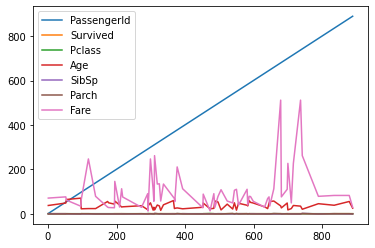

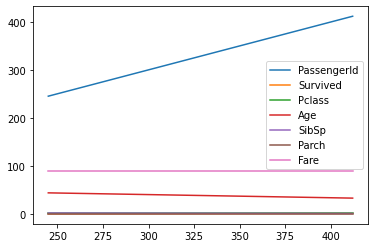

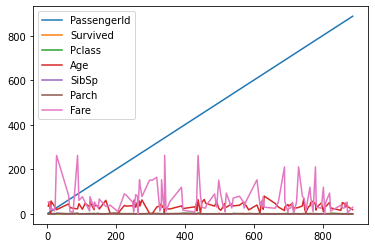

In [218]:
%matplotlib inline
titanic_df_groupby.plot()